# Dataset Features:

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month (1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Importing Modules & Loading Dataset:

In [162]:
## Dataset
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Machine learning
from sklearn import model_selection, preprocessing, feature_selection, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.gofplots import qqplot

## Training models
models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),]

## Importing the dataset
df = pd.read_csv('hour.csv') 
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Preprocessing:

In [116]:
# Dataset not missing any value (null values check)
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
# Renaming columns
df= df.rename(columns={'weathersit':'weather','yr':'year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'})

In [118]:
# Dropping unnecessary colums
df = df.drop (columns = ['instant', 'dteday', 'year'])

In [119]:
# Category Columns
columns = ['season', 'month', 'hour', 'holiday', 'weekday', 'holiday', 'workingday', 'weather']
for i in columns:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


# Data Analysis:

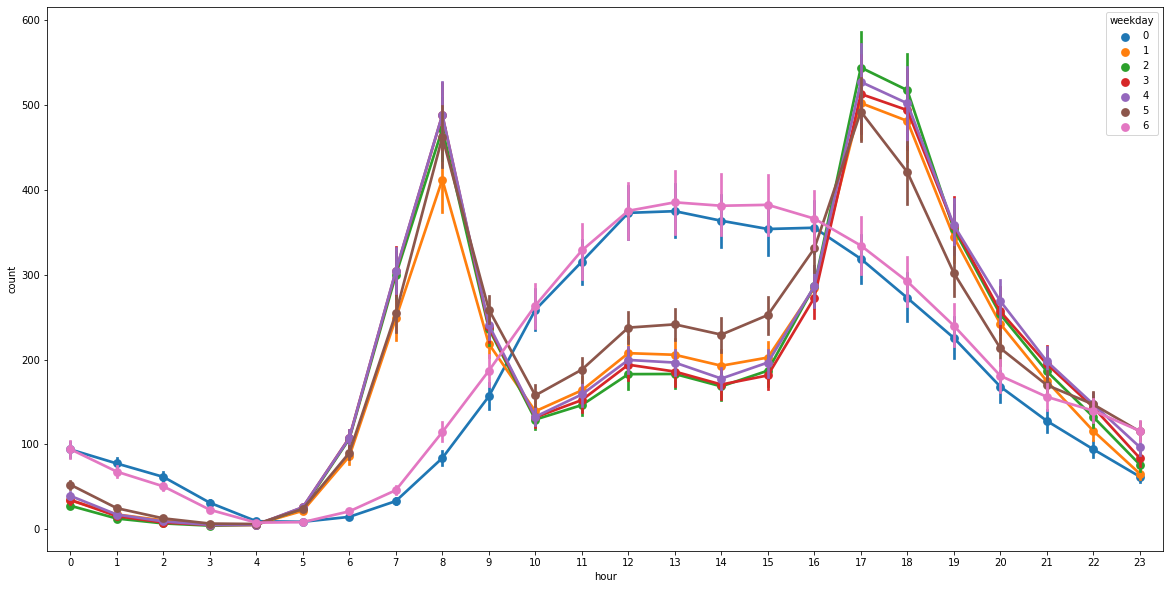

In [120]:
# bikes during the week
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)

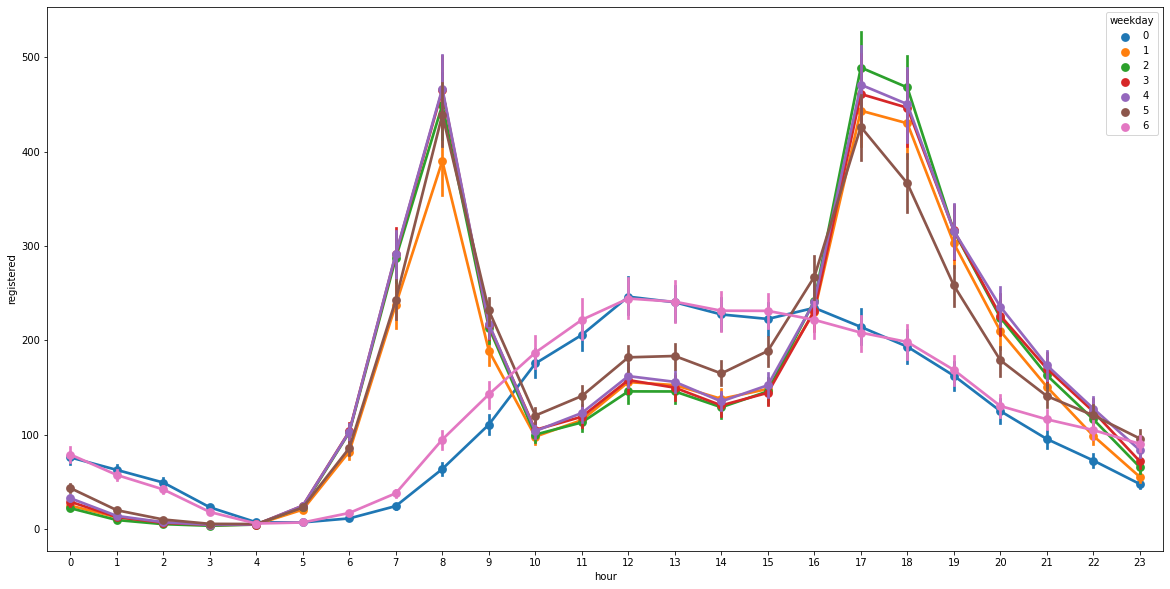

In [121]:
# bikes during the week with subscription
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)

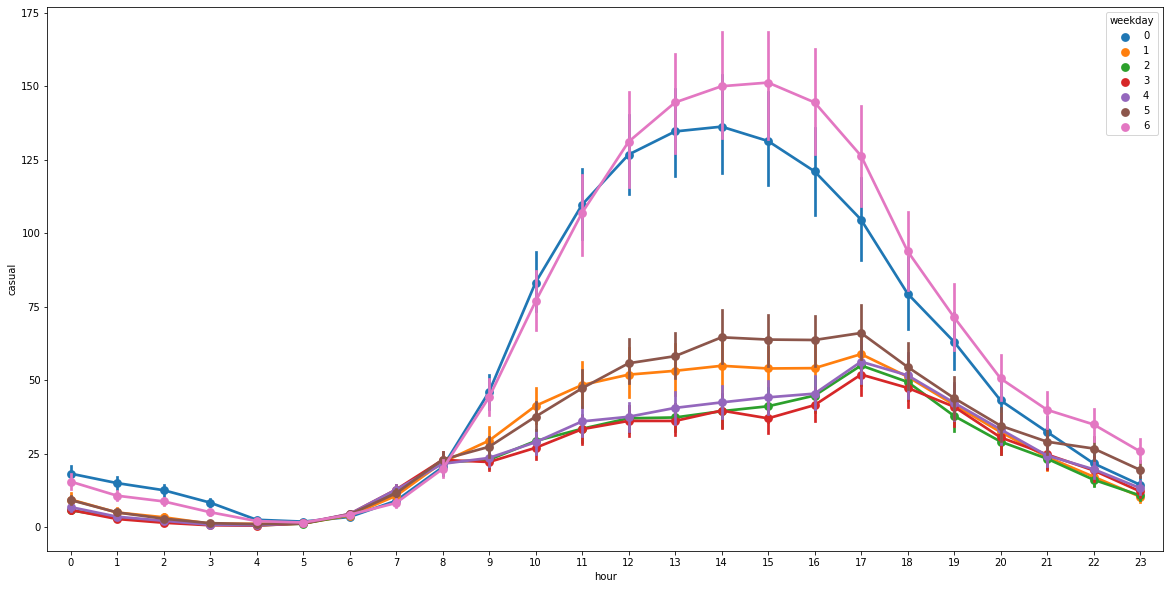

In [122]:
# bikes during the week with no subscription
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)

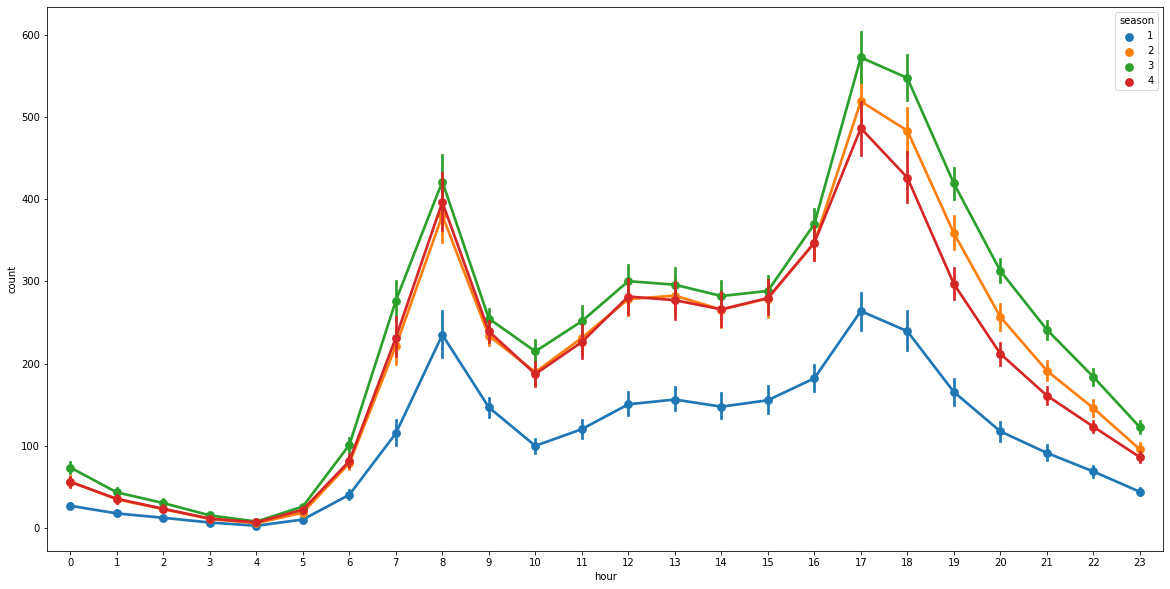

In [123]:
# number of bikes during different seasons
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)

1:spring
2:summer
3:fall
4:winter

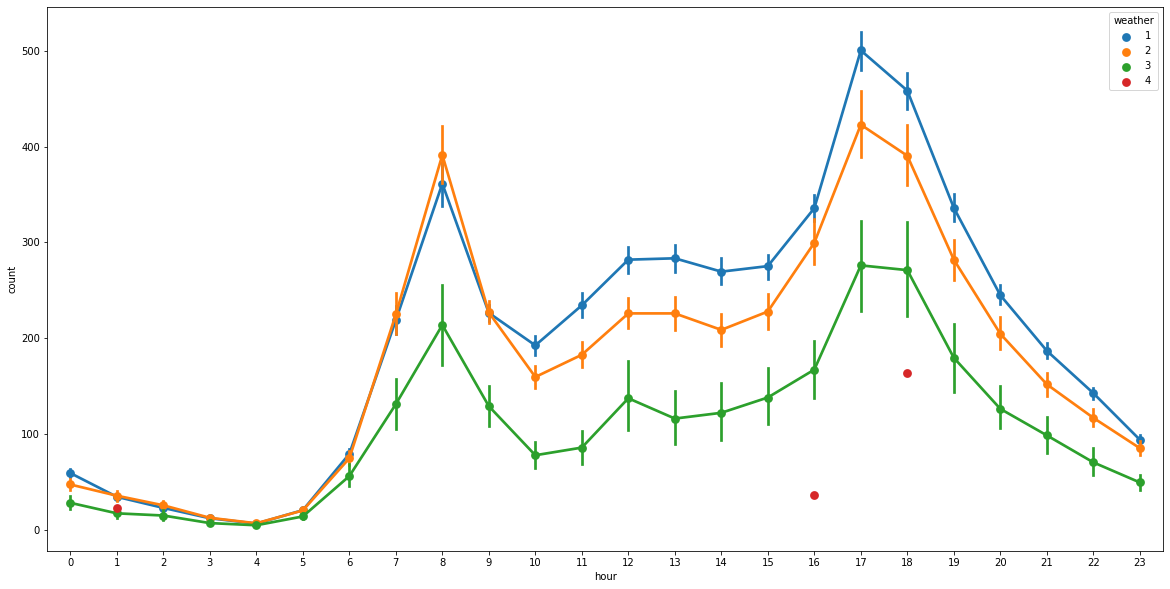

In [124]:
# number of bikes with different weather
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

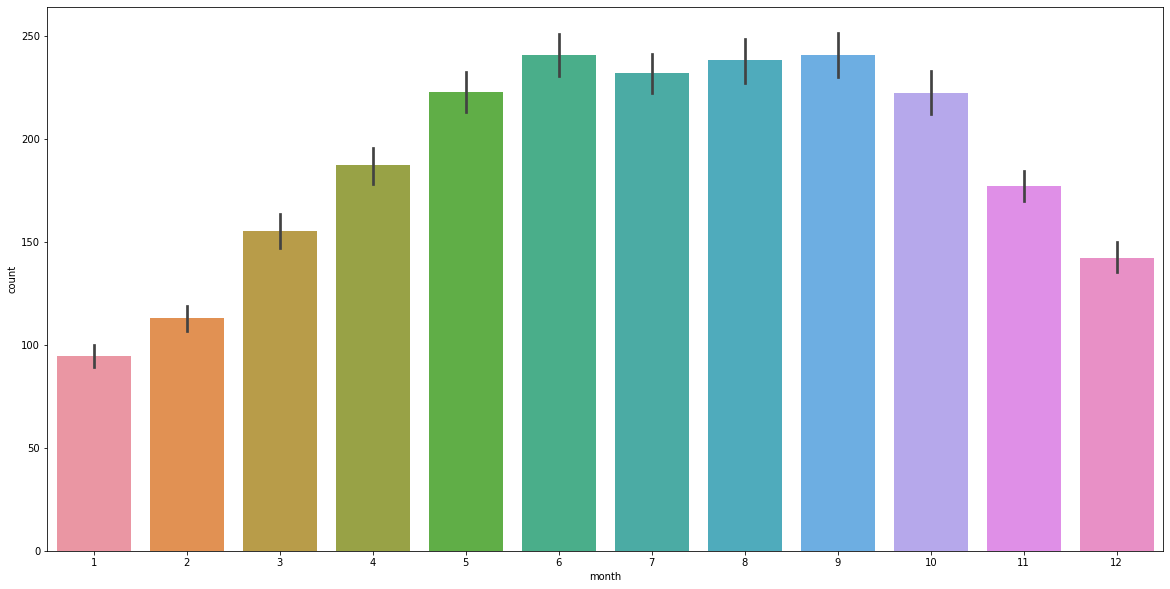

In [125]:
# number of bikes throughout the year
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)

In [128]:
# MinMax Normalization (not useful)
#temp = df.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(temp)
#df = pd.DataFrame(x_scaled, columns = df.columns)

# Printed results
#fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16,6))
#sns.distplot(df['count'], ax=ax1)
#qqplot(df['count'], ax=ax2, line='s')

In [129]:
# Log transformation
df['count'] = np.log(df['count'])

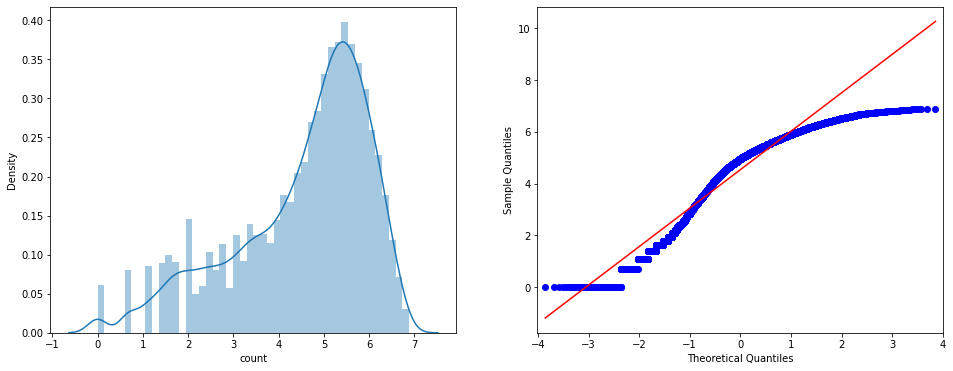

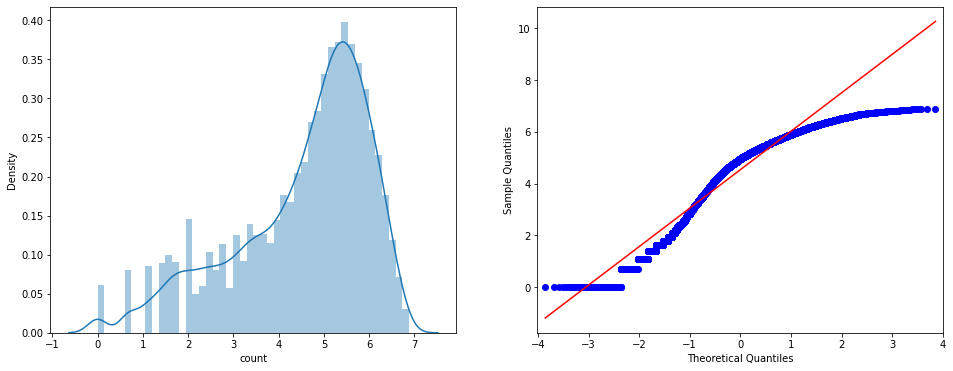

In [130]:
# New results for distribution of the users and theoretical quantiles
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16,6))
sns.distplot(df['count'], ax=ax1)
qqplot(df['count'], ax=ax2, line='s')

# Correlation Matrix:

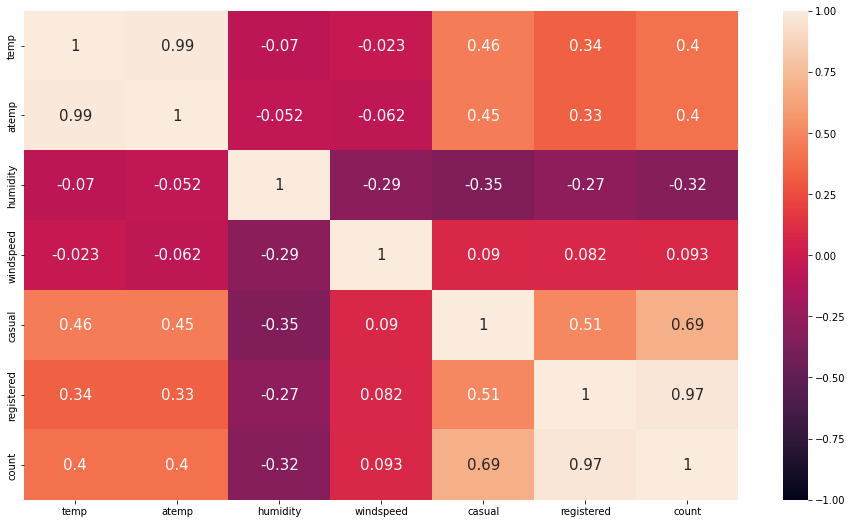

In [126]:
# Heatmap Correlation Matrix
plt.figure(figsize=(16, 9))
heat_map = sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True, annot_kws={'size':15})

# One hot Encoding

In [164]:
# extracting features (save time for model training)
pd.get_dummies(df['season'], drop_first=True)

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [132]:
# One hot encoding increase training time and accuracy

df_temp = df

def onehot_encoding(data, col):
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1) #for each column create a new column
    data = data.drop([col], axis=1) #since we already extracted the features we won't need this column
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for i in cols:
    df_temp = onehot_encoding(df_temp, i)
df_temp.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [133]:
# We will drop the features that are not contributing much so that is registered, casual, windspeed, atemp and the target variable count
x = df_temp.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_temp['count']

# Model Training:

In [144]:
# Training model loop function
i=0
def train(model):
    kfold = model_selection.KFold(n_splits=7)
    # Cross validation
    pred = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
    cv = pred.mean()
    print('Model: ',model)
    print('Cross Validation Score:', abs(cv), '\n')

In [145]:
# Training the model
for model in models:
    train(model)

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Cross Validation Score: 0.6464922539110104 

Model:  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Cross Validation Score: 0.6290469623923686 

Model:  HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
Cross Validation Score: 0.6553727501106171 

Model:  ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
Cross Validation Score: 0.6152908931214895 



In [146]:
# Model performance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [149]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print(model.intercept_)

2.8492684836774886


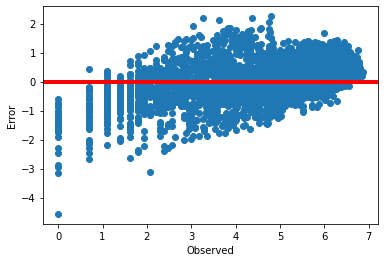

0.6722620736224341

In [159]:
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=4, color='red')
ax.set(ylabel='Error', xlabel='Observed')
plt.show()
np.sqrt(mean_squared_error(y_test, y_pred))


In [160]:
model = ElasticNetCV()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print(model.intercept_)

2.9423477959503463


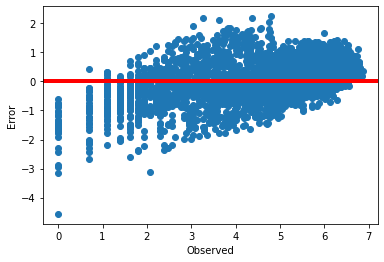

0.6723954041737167

In [161]:
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=4, color='red')
ax.set(ylabel='Error', xlabel='Observed')
plt.show()
np.sqrt(mean_squared_error(y_test, y_pred))